# Wine Cultivar Origin Prediction System
## Model Development and Training

This notebook builds a machine learning model to predict wine cultivar origin based on chemical properties.

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load Wine Dataset

In [ ]:
# Load the wine dataset from sklearn
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['cultivar'] = y

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Distribution:")
print(df['cultivar'].value_counts().sort_index())

Dataset Shape: (178, 14)

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_di

## 3. Data Preprocessing

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nNo missing values found!")

Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
cultivar                        0
dtype: int64

No missing values found!


## 4. Feature Selection

Selected 6 features from the available 13:
1. alcohol
2. malic_acid
3. ash
4. total_phenols
5. flavanoids
6. color_intensity

In [4]:
# Select 6 features
selected_features = ['alcohol', 'malic_acid', 'ash', 'total_phenols', 'flavanoids', 'color_intensity']

X_selected = df[selected_features]
y_target = df['cultivar']

print("Selected Features:")
print(selected_features)
print("\nSelected Features Shape:", X_selected.shape)
print("\nFeature Statistics:")
print(X_selected.describe())

Selected Features:
['alcohol', 'malic_acid', 'ash', 'total_phenols', 'flavanoids', 'color_intensity']

Selected Features Shape: (178, 6)

Feature Statistics:
          alcohol  malic_acid         ash  total_phenols  flavanoids  \
count  178.000000  178.000000  178.000000     178.000000  178.000000   
mean    13.000618    2.336348    2.366517       2.295112    2.029270   
std      0.811827    1.117146    0.274344       0.625851    0.998859   
min     11.030000    0.740000    1.360000       0.980000    0.340000   
25%     12.362500    1.602500    2.210000       1.742500    1.205000   
50%     13.050000    1.865000    2.360000       2.355000    2.135000   
75%     13.677500    3.082500    2.557500       2.800000    2.875000   
max     14.830000    5.800000    3.230000       3.880000    5.080000   

       color_intensity  
count       178.000000  
mean          5.058090  
std           2.318286  
min           1.280000  
25%           3.220000  
50%           4.690000  
75%           6.20

## 5. Feature Scaling

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_target, test_size=0.2, random_state=42, stratify=y_target)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Testing set size:", X_test_scaled.shape)
print("\nScaled Training Data Statistics:")
print("Mean:", X_train_scaled.mean(axis=0))
print("Std Dev:", X_train_scaled.std(axis=0))

Training set size: (142, 6)
Testing set size: (36, 6)

Scaled Training Data Statistics:
Mean: [ 1.09781120e-15 -2.57227729e-16  9.52485352e-16 -2.89283464e-16
  2.00152883e-16  4.45066519e-16]
Std Dev: [1. 1. 1. 1. 1. 1.]


## 6. Model Training - Random Forest Classifier

In [6]:
# Initialize and train Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)
print("Model trained successfully!")

Model trained successfully!


## 7. Model Evaluation

In [7]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("="*60)
print("MODEL EVALUATION METRICS")
print("="*60)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Precision, Recall, F1-Score (weighted)
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
f1_weighted = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nPrecision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=['Cultivar 1', 'Cultivar 2', 'Cultivar 3']))

MODEL EVALUATION METRICS

Training Accuracy: 1.0000
Testing Accuracy: 0.9722

Precision (Weighted): 0.9744
Recall (Weighted): 0.9722
F1-Score (Weighted): 0.9723

CLASSIFICATION REPORT
              precision    recall  f1-score   support

  Cultivar 1       0.92      1.00      0.96        12
  Cultivar 2       1.00      0.93      0.96        14
  Cultivar 3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



## 8. Confusion Matrix

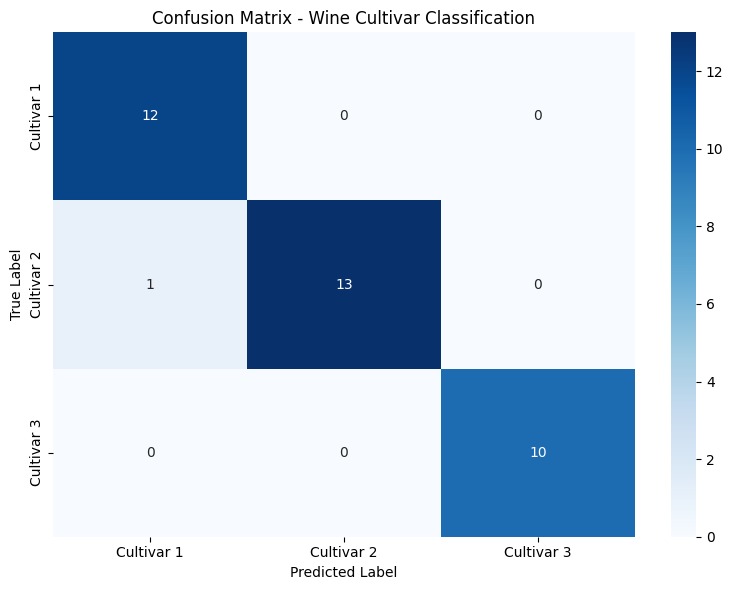

Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


In [8]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cultivar 1', 'Cultivar 2', 'Cultivar 3'],
            yticklabels=['Cultivar 1', 'Cultivar 2', 'Cultivar 3'])
plt.title('Confusion Matrix - Wine Cultivar Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm)

## 9. Feature Importance


Feature Importance:
           Feature  Importance
5  color_intensity    0.287451
4       flavanoids    0.236114
0          alcohol    0.197336
3    total_phenols    0.156018
1       malic_acid    0.097725
2              ash    0.025356


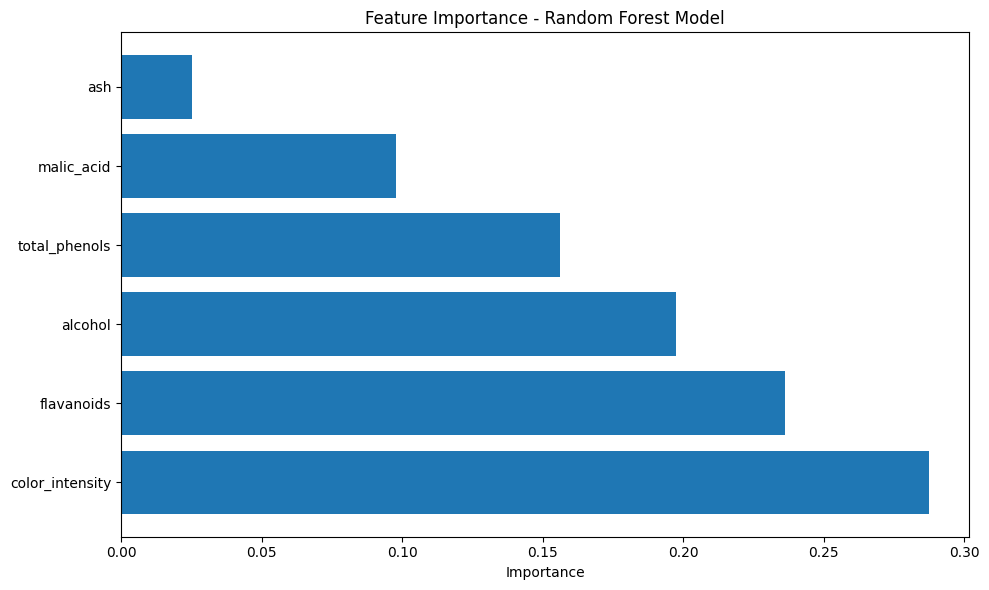

In [9]:
# Get feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Model')
plt.tight_layout()
plt.show()

## 10. Save Model and Scaler

In [10]:
# Save the model and scaler using Joblib
model_path = '../model/wine_cultivar_model.pkl'
scaler_path = '../model/scaler.pkl'
features_path = '../model/selected_features.pkl'

joblib.dump(model, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(selected_features, features_path)

print(f"Model saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")
print(f"Features saved to: {features_path}")
print("\nAll artifacts saved successfully!")

Model saved to: ../model/wine_cultivar_model.pkl
Scaler saved to: ../model/scaler.pkl
Features saved to: ../model/selected_features.pkl

All artifacts saved successfully!


## 11. Model Summary

In [11]:
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)
print(f"Algorithm: Random Forest Classifier")
print(f"Number of estimators: {model.n_estimators}")
print(f"Max depth: {model.max_depth}")
print(f"Selected Features: {len(selected_features)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score (Weighted): {f1_weighted:.4f}")
print(f"Model Persistence: Joblib")
print("="*60)


MODEL SUMMARY
Algorithm: Random Forest Classifier
Number of estimators: 100
Max depth: 10
Selected Features: 6
Training Samples: 142
Testing Samples: 36
Test Accuracy: 0.9722
Test F1-Score (Weighted): 0.9723
Model Persistence: Joblib
